In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification, load_breast_cancer 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve, precision_recall_curve, precision_score, recall_score 


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.3, 
random_state=1) 

In [5]:
model = LogisticRegression() 
model.fit(X_train, y_train) 
probs = model.predict_proba(X_test)[:, 1]

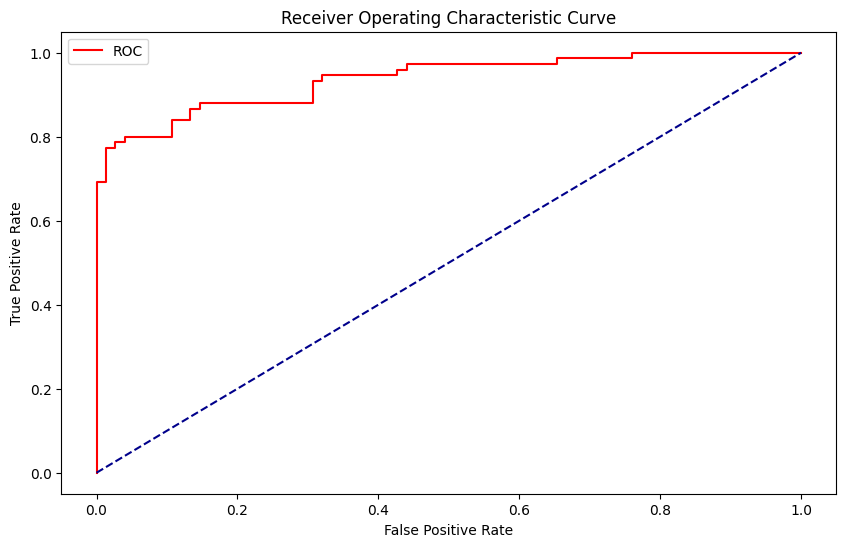

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, probs) 
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', label='ROC') 
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic Curve') 
plt.legend() 
plt.show() 

In [9]:
data = load_breast_cancer() 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['target'] = data.target 
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], 
test_size=0.3, random_state=42) 
model = LogisticRegression() 
model.fit(X_train, y_train) 
pred = model.predict(X_test)

c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
precision = precision_score(y_test, pred) 
recall = recall_score(y_test, pred) 
print('Precision:', precision) 
print('Recall:', recall) 


Precision: 0.963963963963964
Recall: 0.9907407407407407


In [29]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification, load_breast_cancer 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve, precision_score, recall_score 
import pandas as pd 

# Generate synthetic data
dataset1=pd.read_csv("C:\\Users\\moham\\Downloads\\apples_and_oranges.csv") 
X = dataset1.iloc[:, :-1]  # Features (all columns except the last one)
y = dataset1.iloc[:, -1]   # Target (last column)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

# Train and evaluate logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train) 
probs = model.predict_proba(X_test)[:, 1] 
fpr, tpr, _ = roc_curve(y_test, probs) 

# Plot ROC curve
plt.figure(figsize=(10, 6)) 
plt.plot(fpr, tpr, color='red', label='ROC') 
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic Curve') 
plt.legend() 
plt.show() 

# Load breast cancer data
data = load_breast_cancer() 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['target'] = data.target 
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['target'], test_size=0.3, random_state=42) 

# Train and evaluate logistic regression model on breast cancer data
model.fit(X_train, y_train) 
pred = model.predict(X_test) 
precision = precision_score(y_test, pred) 
recall = recall_score(y_test, pred) 
print('Precision:', precision) 
print('Recall:', recall)


ValueError: y_true takes value in {'apple', 'orange'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

Accuracy: 0.8533333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        75
           1       0.85      0.85      0.85        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



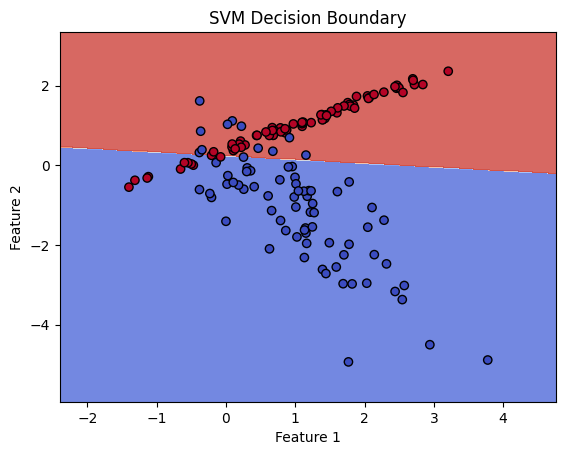

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Generate synthetic data
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train SVM model
model = SVC(kernel='linear', C=1.0)  # You can change kernel to 'rbf', 'poly', etc.
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:\n', classification_report(y_test, y_pred))

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

plot_decision_boundary(X_test, y_test, model)


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
dataset = pd.read_csv("C:\\Users\\moham\\Downloads\\apples_and_oranges.csv")

# Separate features and target
# Assuming the last column is the target variable
X = dataset.iloc[:, :-1]  # Features (all columns except the last one)
y = dataset.iloc[:,-1]   # Target (last column)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train SVM model
model = SVC(kernel='linear', C=1.0)  # You can change kernel to 'rbf', 'poly', etc.
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)



Accuracy: 1.0


In [17]:
dataset.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


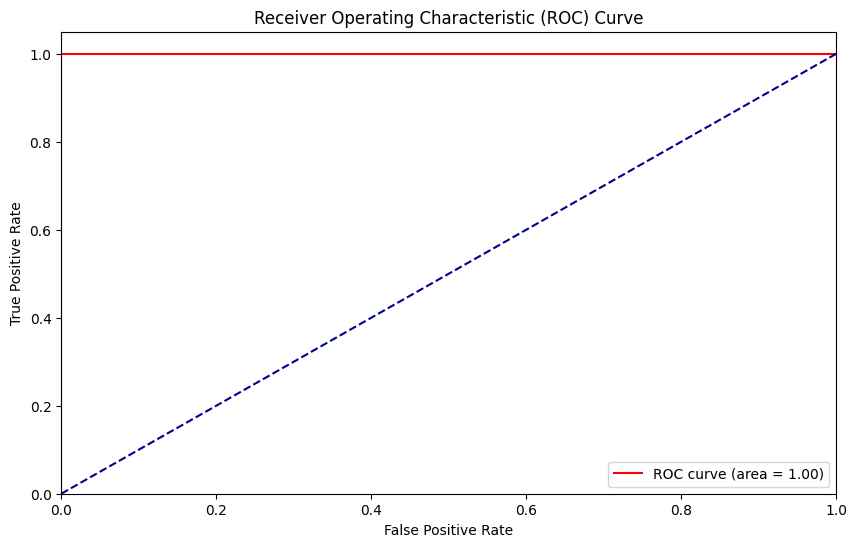

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 27)

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification, load_breast_cancer 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve, precision_recall_curve, precision_score, recall_score 

In [24]:
# Load dataset
dataset = pd.read_csv("C:\\Users\\moham\\Downloads\\apples_and_oranges.csv")

# Separate features and target
# Assuming the last column is the target variable
X = dataset.iloc[:, :-1]  # Features (all columns except the last one)
y = dataset.iloc[:,-1]   # Target (last column)
